In [1]:
import pandas as pd

In [2]:
data = pd.read_excel('metadata/spine_density_hum_and_mouse-20231101.xlsx')
data = data.rename(columns=dict(zip(data.columns, list('ABCDEFGHIJKLMNOPQRSTUV')[0:8])))

In [3]:
mdens = data.loc[3:18, ['A', 'B', 'C', 'D']]
mdens.columns=['distance', 'mean', 'std', 'sem']
mdens = mdens.astype(float)

In [4]:
hdens = data.loc[3:25, ['A', 'F', 'G', 'H']]
hdens.columns=['distance', 'mean', 'std', 'sem']
hdens = hdens.astype(float)

In [5]:
data_new = pd.read_excel('metadata/spine_density_new_data_mouse-20240419.xlsx')
data_new = data_new.rename(columns=dict(zip(data_new.columns, list('ABCDEFGHIJKLMNOPQRSTUVWXYZ') + ['AA', 'AB'])))

In [6]:
mdens_old = data_new.loc[3:21, ['C', 'H', 'I', 'J']]
mdens_old.columns=['distance', 'mean', 'std', 'sem']
mdens_old = mdens_old.astype(float)

In [7]:
mdens_new = data_new.loc[3:21, ['M', 'Z', 'AA', 'AB']]
mdens_new.columns=['distance', 'mean', 'std', 'sem']
mdens_new = mdens_new.astype(float)

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [9]:
Set1 = mpl.colormaps['Set1']
Pastel1 = mpl.colormaps['Pastel1']
mcolor = Set1(0.0)
hcolor = Set1(1.0/9)
mcolor_light = Pastel1(0.0)
hcolor_light = Pastel1(1.0/9)

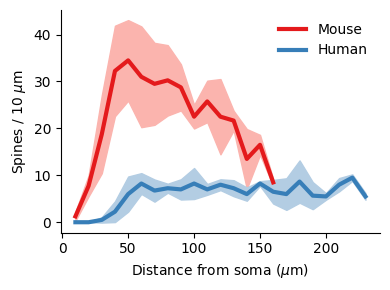

In [10]:
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(mdens['distance'], mdens['mean'], linewidth=3, color=mcolor, label='Mouse')
ax.fill_between(mdens['distance'], (mdens['mean']-mdens['std']), 
                (mdens['mean']+mdens['std']), color=mcolor_light)

ax.plot(hdens['distance'], hdens['mean'], linewidth=3, color=hcolor, label='Human')
ax.fill_between(hdens['distance'], (hdens['mean']-hdens['std']), 
                (hdens['mean']+hdens['std']), color=hcolor_light)

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Spines / 10 $\mu$m')
ax.set_xlabel('Distance from soma ($\mu$m)')
ax.legend(frameon=False)
fig.tight_layout()

In [11]:
from scipy.optimize import curve_fit

In [12]:
def sigmoid(x, a, b, c):
    return a / (1 + np.exp(-(x - b) / c))

In [13]:
def linsigmoid(x, a, b, c, d):
    return a / (1 + np.exp(-(x - b) / c)) * (1 - (x - b) / d)

In [14]:
def expsigmoid(x, a, b, c, d):
    return a / (1 + np.exp(-(x - b) / c)) * np.exp(-(x - b) / d)

Mouse a=3.9924680234991543, b=30.205061309319372, c=6.251664489123547, d=186.7254962225534
Human a=0.7541597660596546, b=43.61407768811902, c=4.21477895985061, d=2152.6791081974548


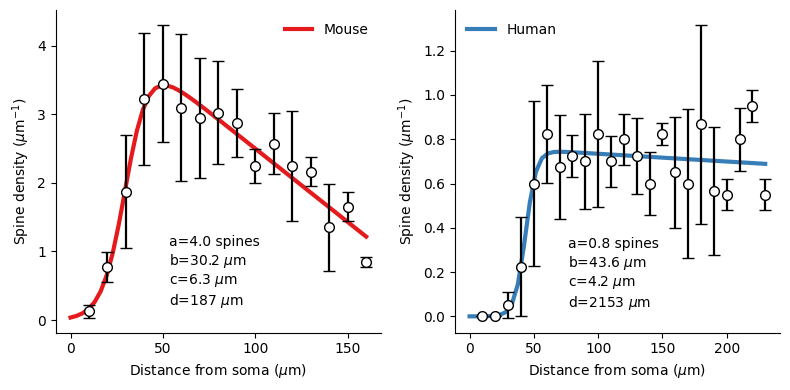

In [15]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 2, 1)

xdata = mdens['distance']
ydata = mdens['mean'] / 10
a, b, c, d = 10, 45, 10, 100
mpopt, _ = curve_fit(linsigmoid, xdata, ydata, p0=(a,b,c,d))
a, b, c, d = mpopt
x = np.linspace(0, max(xdata))
y = linsigmoid(x, *mpopt)
print(f'Mouse {a=}, {b=}, {c=}, {d=}')

ax.plot(x, y, color=mcolor, linewidth=3, label='Mouse')
ax.errorbar(mdens['distance'], mdens['mean']/10, yerr=mdens['std']/10, 
            linestyle='', marker='o', markersize=7, markerfacecolor='w', capsize=4,
            linewidth=3, elinewidth=1.6, color='black')
ax.text(max(xdata)/3, max(ydata)/5, 
        f"{a=:.1f} spines\n{b=:.1f} $\mu$m\n{c=:.1f} $\mu$m\n{d=:.0f} $\mu$m", 
        va='center')

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Spine density ($\mu$m$^{-1}$)')
ax.set_xlabel('Distance from soma ($\mu$m)')
ax.legend(frameon=False)

ax = fig.add_subplot(1, 2, 2)

xdata = hdens['distance']
ydata = hdens['mean'] / 10
hpopt, _ = curve_fit(linsigmoid, xdata, ydata, p0=(a,b,c,d))
a, b, c, d = hpopt
x = np.linspace(0, max(xdata))
y = linsigmoid(x, *hpopt)
print(f'Human {a=}, {b=}, {c=}, {d=}')

ax.plot(x, y, color=hcolor, linewidth=3, label='Human')
ax.errorbar(hdens['distance'], hdens['mean']/10, yerr=hdens['std']/10, 
            linestyle='', marker='o', markersize=7, markerfacecolor='w', capsize=4,
            linewidth=3, elinewidth=1.6, color='black')
ax.text(max(xdata)/3, max(ydata)/5, 
        f"{a=:.1f} spines\n{b=:.1f} $\mu$m\n{c=:.1f} $\mu$m\n{d=:.0f} $\mu$m", 
        va='center')

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Spine density ($\mu$m$^{-1}$)')
ax.set_xlabel('Distance from soma ($\mu$m)')
ax.legend(frameon=False)

fig.tight_layout()

Mouse a=3.9924680234991543, b=30.205061309319372, c=6.251664489123547, d=186.7254962225534
Human a=0.718256851470936, b=43.01991388727045, c=3.89279315262483


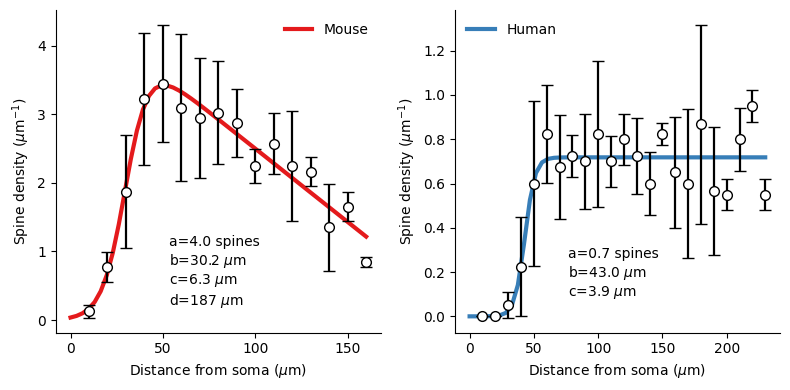

In [16]:
fig = plt.figure(figsize=(8, 4))

ax = fig.add_subplot(1, 2, 1)

xdata = mdens['distance']
ydata = mdens['mean'] / 10
a, b, c, d = 10, 45, 10, 100
mpopt, _ = curve_fit(linsigmoid, xdata, ydata, p0=(a,b,c,d))
a, b, c, d = mpopt
x = np.linspace(0, max(xdata))
y = linsigmoid(x, *mpopt)
print(f'Mouse {a=}, {b=}, {c=}, {d=}')

ax.plot(x, y, color=mcolor, linewidth=3, label='Mouse')
ax.errorbar(mdens['distance'], mdens['mean']/10, yerr=mdens['std']/10, 
            linestyle='', marker='o', markersize=7, markerfacecolor='w', capsize=4,
            linewidth=3, elinewidth=1.6, color='black')
ax.text(max(xdata)/3, max(ydata)/5, 
        f"{a=:.1f} spines\n{b=:.1f} $\mu$m\n{c=:.1f} $\mu$m\n{d=:.0f} $\mu$m", 
        va='center')

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Spine density ($\mu$m$^{-1}$)')
ax.set_xlabel('Distance from soma ($\mu$m)')
ax.legend(frameon=False)

ax = fig.add_subplot(1, 2, 2)

xdata = hdens['distance']
ydata = hdens['mean'] / 10
#hpopt, _ = curve_fit(linsigmoid, xdata, ydata, p0=(a,b,c,d))
#a, b, c, d = hpopt
hpopt, _ = curve_fit(sigmoid, xdata, ydata, p0=(a,b,c))
a, b, c = hpopt
x = np.linspace(0, max(xdata))
#y = linsigmoid(x, *hpopt)
#print(f'Human {a=}, {b=}, {c=}, {d=}')
y = sigmoid(x, *hpopt)
print(f'Human {a=}, {b=}, {c=}')

ax.plot(x, y, color=hcolor, linewidth=3, label='Human')
ax.errorbar(hdens['distance'], hdens['mean']/10, yerr=hdens['std']/10, 
            linestyle='', marker='o', markersize=7, markerfacecolor='w', capsize=4,
            linewidth=3, elinewidth=1.6, color='black')
#ax.text(max(xdata)/3, max(ydata)/5, f"{a=:.1f} spines\n{b=:.1f} $\mu$m\n{c=:.1f} $\mu$m\n{d=:.0f} $\mu$m", va='center')
ax.text(max(xdata)/3, max(ydata)/5, 
        f"{a=:.1f} spines\n{b=:.1f} $\mu$m\n{c=:.1f} $\mu$m", 
        va='center')

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Spine density ($\mu$m$^{-1}$)')
ax.set_xlabel('Distance from soma ($\mu$m)')
ax.legend(frameon=False)

fig.tight_layout()

import json

densityfit = {}
densityfit['Mouse'] = mpopt.tolist()
densityfit['Human'] = hpopt.tolist()

with open('metadata/densityfit.json', 'w') as fp:
    json.dump(densityfit, fp)

Mouse 2m a=3.99246801636713, b=30.20506125496905, c=6.251664396534074, d=186.72549673681908
Mouse 6m a=1.7458824883465107, b=37.906026173978674, c=4.625078029314134, d=35812.39584142641


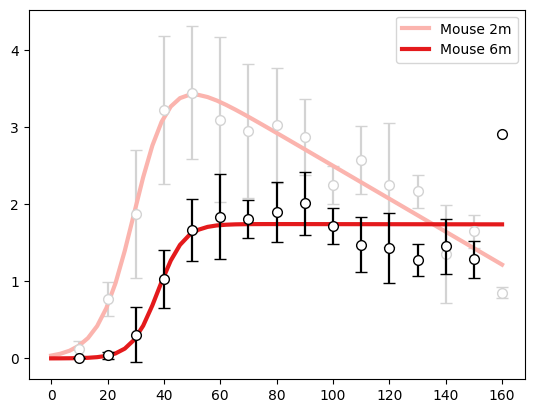

In [17]:
plt.errorbar(mdens_old['distance'], mdens_old['mean'], yerr=mdens_old['std'], 
             linestyle='', marker='o', markersize=7, markerfacecolor='w', capsize=4,
             linewidth=3, elinewidth=1.6, color='lightgrey')
plt.errorbar(mdens_new['distance'], mdens_new['mean'], yerr=mdens_new['std'],
             linestyle='', marker='o', markersize=7, markerfacecolor='w', capsize=4,
             linewidth=3, elinewidth=1.6, zorder=3, color='black')

xdata = mdens_old['distance']
ydata = mdens_old['mean']
a, b, c, d = 10, 45, 10, 100
mpopt, _ = curve_fit(linsigmoid, xdata, ydata, p0=(a,b,c,d))
a, b, c, d = mpopt
x = np.linspace(0, max(xdata))
y = linsigmoid(x, *mpopt)
print(f'Mouse 2m {a=}, {b=}, {c=}, {d=}')

plt.plot(x, y, color=mcolor_light, linewidth=3, label='Mouse 2m')

xdata = mdens_new['distance']
ydata = mdens_new['mean']
a, b, c, d = 10, 45, 10, 100
mpopt, _ = curve_fit(linsigmoid, xdata, ydata, p0=(a,b,c,d))
a, b, c, d = mpopt
x = np.linspace(0, max(xdata))
y = linsigmoid(x, *mpopt)
print(f'Mouse 6m {a=}, {b=}, {c=}, {d=}')

plt.plot(x, y, color=mcolor, linewidth=3, label='Mouse 6m')
plt.legend()

Mouse a=1.6303593875826843, b=37.084155509669145, c=4.2069882964020495
Human a=0.7182570457057172, b=43.01995596246957, c=3.8928549708016957


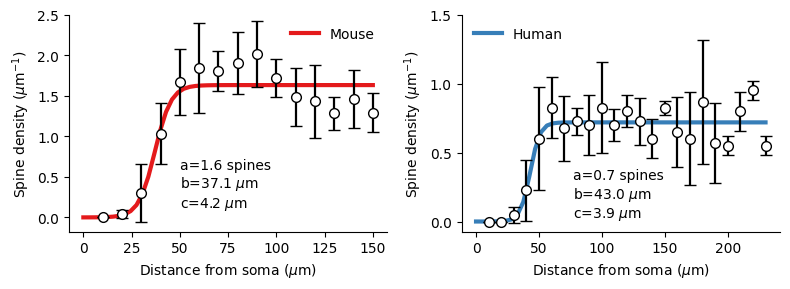

In [18]:
fig = plt.figure(figsize=(8, 3))

ax = fig.add_subplot(1, 2, 1)

xdata = mdens_new['distance'].iloc[:-1]
ydata = mdens_new['mean'].iloc[:-1]
a, b, c, d = 10, 45, 10, 100
#mpopt, _ = curve_fit(linsigmoid, xdata, ydata, p0=(a,b,c,d))
#a, b, c, d = mpopt
mpopt, _ = curve_fit(sigmoid, xdata, ydata, p0=(a,b,c))
a, b, c = mpopt
x = np.linspace(0, max(xdata))
#y = linsigmoid(x, *mpopt)
y = sigmoid(x, *mpopt)
#print(f'Mouse {a=}, {b=}, {c=}, {d=}')
print(f'Mouse {a=}, {b=}, {c=}')

ax.plot(x, y, color=mcolor, linewidth=3, label='Mouse')
ax.errorbar(mdens_new['distance'].iloc[:-1], mdens_new['mean'].iloc[:-1], yerr=mdens_new['std'].iloc[:-1], 
            linestyle='', marker='o', markersize=7, markerfacecolor='w', capsize=4,
            linewidth=3, elinewidth=1.6, color='black')
#ax.text(max(xdata)/3, max(ydata)/5, f"{a=:.1f} spines\n{b=:.1f} $\mu$m\n{c=:.1f} $\mu$m\n{d=:.0f} $\mu$m", va='center')
ax.text(max(xdata)/3, max(ydata)/5, f"{a=:.1f} spines\n{b=:.1f} $\mu$m\n{c=:.1f} $\mu$m", va='center')

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Spine density ($\mu$m$^{-1}$)')
ax.set_xlabel('Distance from soma ($\mu$m)')
ax.set_yticks([0,.5,1,1.5,2,2.5])
ax.set_ylim(top=2.5)
ax.legend(frameon=False)

ax = fig.add_subplot(1, 2, 2)

xdata = hdens['distance']
ydata = hdens['mean'] / 10
#hpopt, _ = curve_fit(linsigmoid, xdata, ydata, p0=(a,b,c,d))
#a, b, c, d = hpopt
hpopt, _ = curve_fit(sigmoid, xdata, ydata, p0=(a,b,c))
a, b, c = hpopt
x = np.linspace(0, max(xdata))
#y = linsigmoid(x, *hpopt)
#print(f'Human {a=}, {b=}, {c=}, {d=}')
y = sigmoid(x, *hpopt)
print(f'Human {a=}, {b=}, {c=}')

ax.plot(x, y, color=hcolor, linewidth=3, label='Human')
ax.errorbar(hdens['distance'], hdens['mean']/10, yerr=hdens['std']/10, 
            linestyle='', marker='o', markersize=7, markerfacecolor='w', capsize=4,
            linewidth=3, elinewidth=1.6, color='black')
#ax.text(max(xdata)/3, max(ydata)/5, f"{a=:.1f} spines\n{b=:.1f} $\mu$m\n{c=:.1f} $\mu$m\n{d=:.0f} $\mu$m", va='center')
ax.text(max(xdata)/3, max(ydata)/5, 
        f"{a=:.1f} spines\n{b=:.1f} $\mu$m\n{c=:.1f} $\mu$m", 
        va='center')

ax.spines[['right', 'top']].set_visible(False)
ax.set_ylabel('Spine density ($\mu$m$^{-1}$)')
ax.set_xlabel('Distance from soma ($\mu$m)')
ax.set_yticks([0,.5,1,1.5])
ax.set_ylim(top=1.5)
ax.legend(frameon=False)

fig.tight_layout()

In [21]:
import json

densityfit = {}
densityfit['Mouse'] = mpopt.tolist()
densityfit['Human'] = hpopt.tolist()

with open('metadata/densityfit.json', 'w') as fp:
    json.dump(densityfit, fp)